# MC906 - Introdução à inteligência artificial
### RA: 171036 - Felipe Duarte Domingues
Ciência da Computação - Graduação  
E-mail: felipe.domingues@students.ic.unicamp.br

## Projeto 3 - Controlador Fuzzy

Esse notebook contém as demonstrações das funções fuzzy experimentadas. Os controladores estão implementados nos arquivos 

In [21]:
%matplotlib inline
import numpy as np
import math
from math import pi
import matplotlib
import skfuzzy as fuzz
from skfuzzy import interp_membership, defuzz
from skfuzzy.control.controlsystem import _interp_universe_fast
ctrl = fuzz.control

import warnings
warnings.filterwarnings('ignore')

In [2]:
# WARNING, monkey patch ahead.
# Couldn't find on the new API an easy method to use Larsen's max-prod instead of Mandani's max-min.
# This code is a monkey patch to enable the switching from Mandani to Larsen using a flag
# In the original code, the Mandani's method is hardcoded

COMPOSITION_MANDANI = np.minimum
COMPOSITION_LARSEN = np.multiply

def find_memberships(self):
    '''
    First we have to upsample the universe of self.var in order to add the
    key points of the membership function based on the activation level
    for this consequent, using the interp_universe function, which
    interpolates the `xx` values in the universe such that its membership
    function value is the activation level.
    '''
    # Find potentially new values
    new_values = []

    for label, term in self.var.terms.items():
        term._cut = term.membership_value[self.sim]
        if term._cut is None:
            continue  # No membership defined for this adjective

        # Faster to aggregate as list w/duplication
        new_values.extend(
            _interp_universe_fast(
                self.var.universe, term.mf, term._cut).tolist())

    new_universe = np.union1d(self.var.universe, new_values)

    # Initilize membership
    output_mf = np.zeros_like(new_universe, dtype=np.float64)

    # Build output membership function
    term_mfs = {}
    for label, term in self.var.terms.items():
        if term._cut is None:
            continue  # No membership defined for this adjective

        upsampled_mf = interp_membership(
            self.var.universe, term.mf, new_universe)
        
        term_mfs[label] = self.sim.ctrl.composition_method(term._cut, upsampled_mf) # <- here we load the composition method
        np.maximum(output_mf, term_mfs[label], output_mf)
    return new_universe, output_mf, term_mfs

ctrl.ControlSystem.composition_method = COMPOSITION_MANDANI # Defaults to Mandani
ctrl.controlsystem.CrispValueCalculator.find_memberships = find_memberships

# Wall following

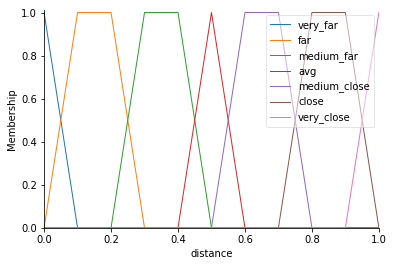

In [3]:
# MF1
DISTANCE_STEP = 0.1
distance = ctrl.Antecedent(np.arange(0, 1+DISTANCE_STEP, DISTANCE_STEP), 'distance')

distance['very_far'] = fuzz.trapmf(distance.universe, [0, 0, 0, 0.1])
distance['far'] = fuzz.trapmf(distance.universe, [0, 0.1, 0.2, 0.3])
distance['medium_far'] = fuzz.trapmf(distance.universe, [0.2, 0.3, 0.4, 0.5])
distance['avg'] = fuzz.trapmf(distance.universe, [0.4, 0.5, 0.5, 0.6])
distance['medium_close'] = fuzz.trapmf(distance.universe, [0.5, 0.6, 0.7, 0.8])
distance['close'] = fuzz.trapmf(distance.universe, [0.7, 0.8, 0.9, 1])
distance['very_close'] = fuzz.trapmf(distance.universe, [0.9, 1, 1, 1])

distance.view()

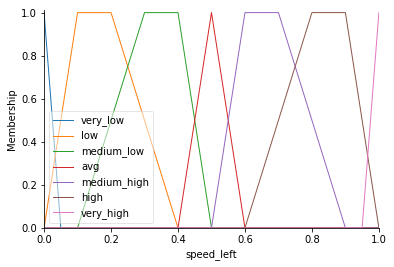

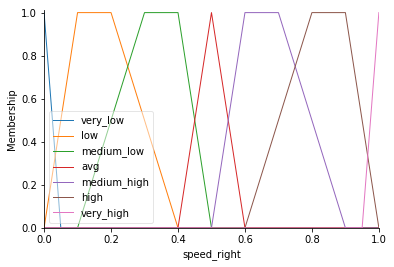

In [4]:
# MF1
SPEED_STEP = 0.05

# in function of the max speed
speed_left = ctrl.Consequent(np.arange(0, 1+SPEED_STEP, SPEED_STEP), 'speed_left')
speed_left['very_low'] = fuzz.trimf(speed_left.universe, [0, 0, 0.05])
speed_left['low'] = fuzz.trapmf(speed_left.universe, [0,0.1,0.2,0.4])
speed_left['medium_low'] = fuzz.trapmf(speed_left.universe, [0.1, 0.3, 0.4, 0.5])
speed_left['avg'] = fuzz.trapmf(speed_left.universe, [0.4, 0.5, 0.5, 0.6])
speed_left['medium_high'] = fuzz.trapmf(speed_left.universe, [0.5, 0.6, 0.7, 0.9])
speed_left['high'] = fuzz.trapmf(speed_left.universe, [0.6, 0.8, 0.9, 1])
speed_left['very_high'] = fuzz.trimf(speed_left.universe, [0.95, 1, 1])

speed_left.view()

speed_right = ctrl.Consequent(np.arange(0, 1+SPEED_STEP, SPEED_STEP), 'speed_right')
speed_right['very_low'] = fuzz.trimf(speed_right.universe, [0, 0, 0.05])
speed_right['low'] = fuzz.trapmf(speed_right.universe, [0,0.1,0.2,0.4])
speed_right['medium_low'] = fuzz.trapmf(speed_right.universe, [0.1, 0.3, 0.4, 0.5])
speed_right['avg'] = fuzz.trapmf(speed_right.universe, [0.4, 0.5, 0.5, 0.6])
speed_right['medium_high'] = fuzz.trapmf(speed_right.universe, [0.5, 0.6, 0.7, 0.9])
speed_right['high'] = fuzz.trapmf(speed_right.universe, [0.6, 0.8, 0.9, 1])
speed_right['very_high'] = fuzz.trimf(speed_right.universe, [0.95, 1, 1])
speed_right.view()

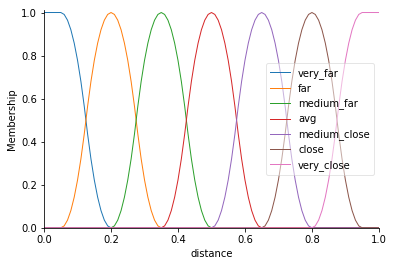

In [5]:
# MF2
DISTANCE_STEP = 0.01
distance = ctrl.Antecedent(np.arange(0, 1+DISTANCE_STEP, DISTANCE_STEP), 'distance')

distance['very_far'] = fuzz.pimf(distance.universe, -DISTANCE_STEP,-DISTANCE_STEP,0.05, 0.2)
distance['far'] = fuzz.pimf(distance.universe, 0.05, 0.2, 0.2, 0.35)
distance['medium_far'] = fuzz.pimf(distance.universe, 0.2, 0.35, 0.35, 0.5)
distance['avg'] = fuzz.pimf(distance.universe, 0.35, 0.5, 0.5, 0.65)
distance['medium_close'] = fuzz.pimf(distance.universe, 0.5, 0.65, 0.65, 0.8)
distance['close'] = fuzz.pimf(distance.universe, 0.65, 0.8, 0.8, 0.95)
distance['very_close'] = fuzz.pimf(distance.universe, 0.8, 0.95, 1+DISTANCE_STEP, 1+DISTANCE_STEP)

distance.view()

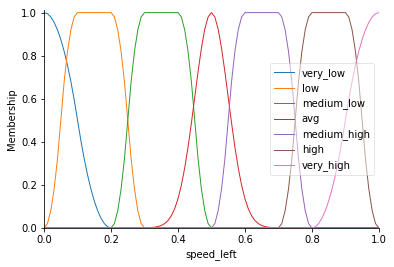

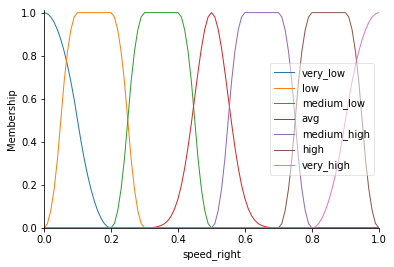

In [6]:
# MF2
SPEED_STEP = 0.01
# in function of the max speed

speed_left = ctrl.Consequent(np.arange(0, 1+SPEED_STEP, SPEED_STEP), 'speed_left')
speed_left['very_low'] = fuzz.zmf(speed_left.universe, 0, 0.2)
speed_left['low'] =  fuzz.pimf(speed_left.universe, 0, 0.1, 0.2, 0.3)
speed_left['medium_low'] = fuzz.pimf(speed_left.universe, 0.2, 0.3, 0.4, 0.5)
speed_left['avg'] = fuzz.gaussmf(speed_left.universe, 0.5, 0.05)
speed_left['medium_high'] = fuzz.pimf(speed_left.universe, 0.5, 0.6, 0.7, 0.8)
speed_left['high'] = fuzz.pimf(speed_left.universe, 0.7, 0.8, 0.9, 1)
speed_left['very_high'] = fuzz.smf(speed_left.universe, 0.8, 1)
speed_left.view()

speed_right = ctrl.Consequent(np.arange(0, 1+SPEED_STEP, SPEED_STEP), 'speed_right')
speed_right['very_low'] = fuzz.zmf(speed_right.universe, 0, 0.2)
speed_right['low'] =  fuzz.pimf(speed_right.universe, 0, 0.1, 0.2, 0.3)
speed_right['medium_low'] = fuzz.pimf(speed_right.universe, 0.2, 0.3, 0.4, 0.5)
speed_right['avg'] = fuzz.gaussmf(speed_right.universe, 0.5, 0.05)
speed_right['medium_high'] = fuzz.pimf(speed_right.universe, 0.5, 0.6, 0.7, 0.8)
speed_right['high'] = fuzz.pimf(speed_right.universe, 0.7, 0.8, 0.9, 1)
speed_right['very_high'] = fuzz.smf(speed_right.universe, 0.8, 1)
speed_right.view()

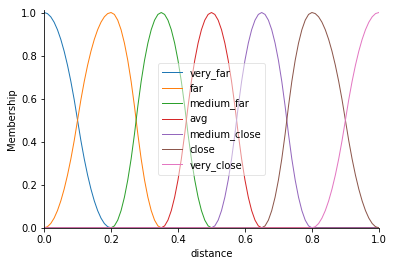

In [12]:
# MF3
DISTANCE_STEP = 0.01
distance = ctrl.Antecedent(np.arange(0, 1+DISTANCE_STEP, DISTANCE_STEP), 'distance')

distance['very_far'] = fuzz.pimf(distance.universe, -DISTANCE_STEP,-DISTANCE_STEP,0.0, 0.2)
distance['far'] = fuzz.pimf(distance.universe, 0.00, 0.2, 0.2, 0.35)
distance['medium_far'] = fuzz.pimf(distance.universe, 0.2, 0.35, 0.35, 0.5)
distance['avg'] = fuzz.pimf(distance.universe, 0.35, 0.5, 0.5, 0.65)
distance['medium_close'] = fuzz.pimf(distance.universe, 0.5, 0.65, 0.65, 0.8)
distance['close'] = fuzz.pimf(distance.universe, 0.65, 0.8, 0.8, 1)
distance['very_close'] = fuzz.pimf(distance.universe, 0.8, 1, 1+DISTANCE_STEP, 1+DISTANCE_STEP)

distance.view()

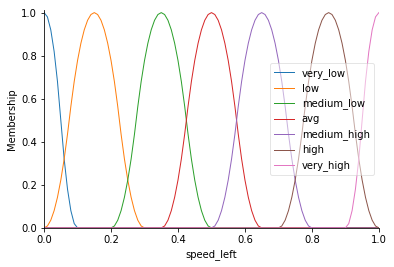

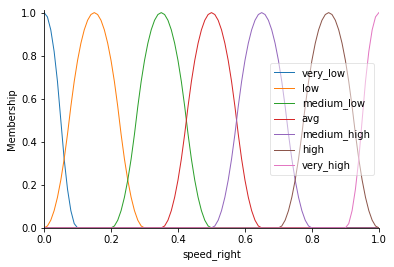

In [13]:
# MF3
SPEED_STEP = 0.01
# in function of the max speed

speed_left = ctrl.Consequent(np.arange(0, 1+SPEED_STEP, SPEED_STEP), 'speed_left')
speed_left['very_low'] = fuzz.zmf(speed_left.universe, 0, 0.1)
speed_left['low'] = fuzz.pimf(speed_left.universe, 0.00, 0.15, 0.15, 0.3)
speed_left['medium_low'] = fuzz.pimf(speed_left.universe, 0.2, 0.35, 0.35, 0.5)
speed_left['avg'] = fuzz.pimf(speed_left.universe, 0.35, 0.5, 0.5, 0.65)
speed_left['medium_high'] = fuzz.pimf(speed_left.universe, 0.5, 0.65, 0.65, 0.8)
speed_left['high'] = fuzz.pimf(speed_left.universe, 0.7, 0.85, 0.85, 1)
speed_left['very_high'] = fuzz.smf(speed_left.universe, 0.9, 1)
speed_left.view()

speed_right = ctrl.Consequent(np.arange(0, 1+SPEED_STEP, SPEED_STEP), 'speed_right')
speed_right['very_low'] = fuzz.zmf(speed_right.universe, 0, 0.1)
speed_right['low'] = fuzz.pimf(speed_right.universe, 0.00, 0.15, 0.15, 0.3)
speed_right['medium_low'] = fuzz.pimf(speed_right.universe, 0.2, 0.35, 0.35, 0.5)
speed_right['avg'] = fuzz.pimf(speed_right.universe, 0.35, 0.5, 0.5, 0.65)
speed_right['medium_high'] = fuzz.pimf(speed_right.universe, 0.5, 0.65, 0.65, 0.8)
speed_right['high'] = fuzz.pimf(speed_right.universe, 0.7, 0.85, 0.85, 1)
speed_right['very_high'] = fuzz.smf(speed_right.universe, 0.9, 1)
speed_right.view()


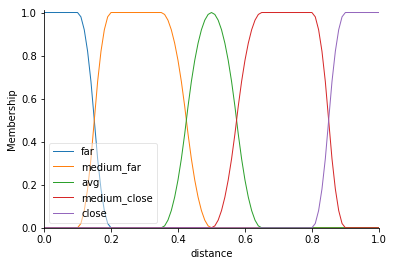

In [9]:
# MF4  -> modelo com 5 classes, resultado não satisfatório, não foi incluido no relatório
DISTANCE_STEP = 0.01
distance = ctrl.Antecedent(np.arange(0, 1+DISTANCE_STEP, DISTANCE_STEP), 'distance')

distance['far'] = fuzz.pimf(distance.universe, -DISTANCE_STEP, -DISTANCE_STEP, 0.1, 0.2)
distance['medium_far'] = fuzz.pimf(distance.universe, 0.1, 0.2, 0.35, 0.5)
distance['avg'] = fuzz.pimf(distance.universe, 0.35, 0.5, 0.5, 0.65)
distance['medium_close'] = fuzz.pimf(distance.universe, 0.5, 0.65, 0.8, 0.9)
distance['close'] = fuzz.pimf(distance.universe, 0.8, 0.9, 1+DISTANCE_STEP, 1+DISTANCE_STEP)

distance.view()

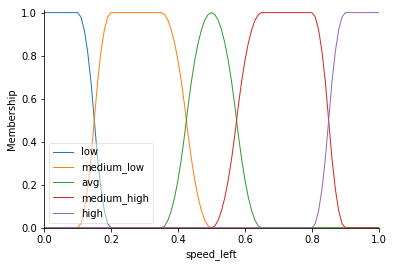

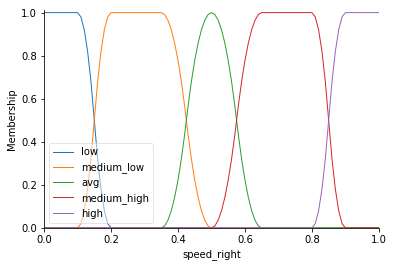

In [10]:
# MF4 -> modelo com 5 classes, resultado não satisfatório, não foi incluido no relatório
SPEED_STEP = 0.01
speed_left = ctrl.Consequent(np.arange(0, 1+SPEED_STEP, SPEED_STEP), 'speed_left')
speed_left['low'] = fuzz.pimf(speed_left.universe, -SPEED_STEP, 0, 0.1, 0.2)
speed_left['medium_low'] = fuzz.pimf(speed_left.universe, 0.1, 0.2, 0.35, 0.5)
speed_left['avg'] = fuzz.pimf(speed_left.universe, 0.35, 0.5, 0.5, 0.65)
speed_left['medium_high'] = fuzz.pimf(speed_left.universe, 0.5, 0.65, 0.8, 0.9)
speed_left['high'] = fuzz.pimf(speed_left.universe, 0.8, 0.9, 1, 1+SPEED_STEP)
speed_left.view()

speed_right = ctrl.Consequent(np.arange(0, 1+SPEED_STEP, SPEED_STEP), 'speed_right')
speed_right['low'] = fuzz.pimf(speed_right.universe, -SPEED_STEP, 0, 0.1, 0.2)
speed_right['medium_low'] = fuzz.pimf(speed_right.universe, 0.1, 0.2, 0.35, 0.5)
speed_right['avg'] = fuzz.pimf(speed_right.universe, 0.35, 0.5, 0.5, 0.65)
speed_right['medium_high'] = fuzz.pimf(speed_right.universe, 0.5, 0.65, 0.8, 0.9)
speed_right['high'] = fuzz.pimf(speed_right.universe, 0.8, 0.9, 1, 1+SPEED_STEP)
speed_right.view()

0.1772490163463529

0.822750983653647

(None, None)

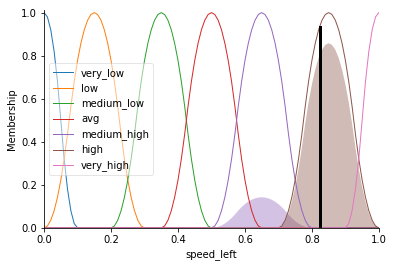

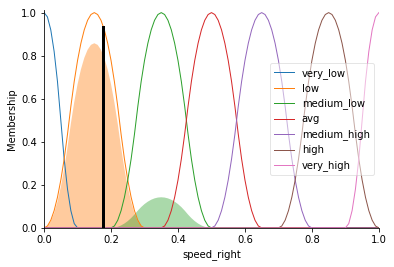

In [14]:
speed_right.defuzzify_method = 'centroid'
speed_left.defuzzify_method = 'centroid'

rules = [ctrl.Rule(distance['very_far'], speed_right['very_low']),
                      ctrl.Rule(distance['far'], speed_right['low']),
                      ctrl.Rule(distance['medium_far'], speed_right['medium_low']),
                      ctrl.Rule(distance['avg'], speed_right['avg']),
                      ctrl.Rule(distance['medium_close'], speed_right['medium_high']),
                      ctrl.Rule(distance['close'], speed_right['high']),
                      ctrl.Rule(distance['very_close'], speed_right['very_high']),

                      ctrl.Rule(distance['very_far'], speed_left['very_high']),
                      ctrl.Rule(distance['far'], speed_left['high']),
                      ctrl.Rule(distance['medium_far'], speed_left['medium_high']),
                      ctrl.Rule(distance['avg'], speed_left['avg']),
                      ctrl.Rule(distance['medium_close'], speed_left['medium_low']),
                      ctrl.Rule(distance['close'], speed_left['low']),
                      ctrl.Rule(distance['very_close'], speed_left['very_low'])]

speed_ctrl = ctrl.ControlSystem(rules)
speed_ctrl.composition_method = COMPOSITION_LARSEN
speed_sim = ctrl.ControlSystemSimulation(speed_ctrl)

speed_sim.input['distance'] = 0.24
speed_sim.compute()
display(speed_sim.output['speed_right'], speed_sim.output['speed_left'])

speed_left.view(sim=speed_sim), speed_right.view(sim=speed_sim)

# Avoid obstacles

### Esse controlador NÃO foi incluido no relatório, mas trata-se de um controlador para fugir de obstáculos móveis, caso não haja nenhum obstáculo no caminho o robô permanece parado

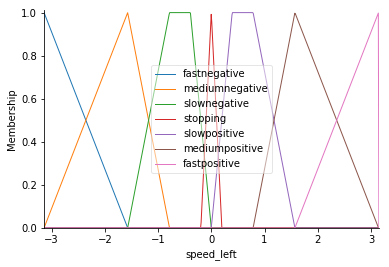

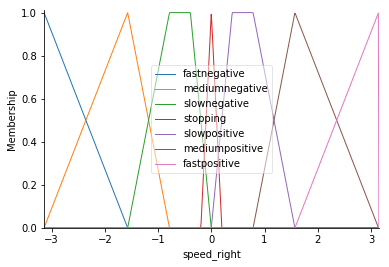

In [22]:
import math

MAX_SPEED = math.pi
SPEED_STEP = 0.01

speed_left = ctrl.Consequent(np.arange(-MAX_SPEED, MAX_SPEED+SPEED_STEP, SPEED_STEP), 'speed_left')
speed_left['fastnegative'] = fuzz.trimf(speed_left.universe, [-MAX_SPEED, -MAX_SPEED, -MAX_SPEED/2])
speed_left['mediumnegative'] = fuzz.trapmf(speed_left.universe, [-MAX_SPEED,-MAX_SPEED/2,-MAX_SPEED/2,-MAX_SPEED/4])
speed_left['slownegative'] = fuzz.trapmf(speed_left.universe, [-MAX_SPEED/2, -MAX_SPEED/4, -MAX_SPEED/8, 0])
speed_left['stopping'] = fuzz.trimf(speed_left.universe, [-MAX_SPEED/16, 0, MAX_SPEED/16])
speed_left['slowpositive'] = fuzz.trapmf(speed_left.universe, [0,MAX_SPEED/8,MAX_SPEED/4,MAX_SPEED/2])
speed_left['mediumpositive'] = fuzz.trapmf(speed_left.universe, [MAX_SPEED/4, MAX_SPEED/2, MAX_SPEED/2, MAX_SPEED])
speed_left['fastpositive'] = fuzz.trimf(speed_left.universe, [MAX_SPEED/2, MAX_SPEED, MAX_SPEED])
speed_left.view()

speed_right = ctrl.Consequent(np.arange(-MAX_SPEED, MAX_SPEED+SPEED_STEP, SPEED_STEP), 'speed_right')
speed_right['fastnegative'] = fuzz.trimf(speed_right.universe, [-MAX_SPEED, -MAX_SPEED, -MAX_SPEED/2])
speed_right['mediumnegative'] = fuzz.trapmf(speed_right.universe, [-MAX_SPEED,-MAX_SPEED/2,-MAX_SPEED/2,-MAX_SPEED/4])
speed_right['slownegative'] = fuzz.trapmf(speed_right.universe, [-MAX_SPEED/2, -MAX_SPEED/4, -MAX_SPEED/8, 0])
speed_right['stopping'] = fuzz.trimf(speed_right.universe, [-MAX_SPEED/16, 0, MAX_SPEED/16])
speed_right['slowpositive'] = fuzz.trapmf(speed_right.universe, [0,MAX_SPEED/8,MAX_SPEED/4,MAX_SPEED/2])
speed_right['mediumpositive'] = fuzz.trapmf(speed_right.universe, [MAX_SPEED/4, MAX_SPEED/2, MAX_SPEED/2, MAX_SPEED])
speed_right['fastpositive'] = fuzz.trimf(speed_right.universe, [MAX_SPEED/2, MAX_SPEED, MAX_SPEED])
speed_right.view()

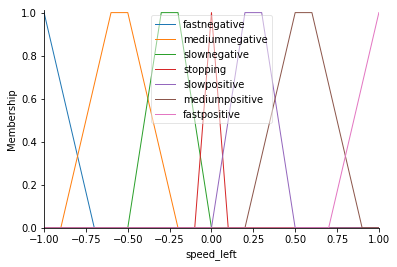

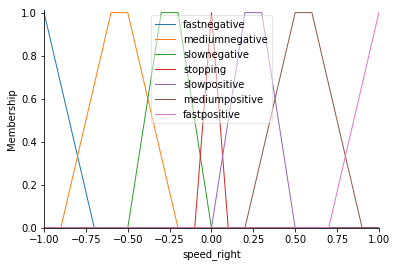

In [23]:
import math

SPEED_STEP = 0.01

speed_left = ctrl.Consequent(np.arange(-1, 1+SPEED_STEP, SPEED_STEP), 'speed_left')
speed_left['fastnegative'] = fuzz.trimf(speed_left.universe, [-1-SPEED_STEP, -1, -0.7])
speed_left['mediumnegative'] = fuzz.trapmf(speed_left.universe, [-0.9,-0.6,-0.5,-0.2])
speed_left['slownegative'] = fuzz.trapmf(speed_left.universe, [-0.5, -0.3, -0.2, 0])
speed_left['stopping'] = fuzz.trimf(speed_left.universe, [-0.1, 0, 0.1])
speed_left['slowpositive'] = fuzz.trapmf(speed_left.universe, [0, 0.2, 0.3, 0.5])
speed_left['mediumpositive'] = fuzz.trapmf(speed_left.universe, [0.2, 0.5, 0.6, 0.9])
speed_left['fastpositive'] = fuzz.trimf(speed_left.universe, [0.7, 1, 1+SPEED_STEP])
speed_left.view()

speed_right = ctrl.Consequent(np.arange(-1, 1+SPEED_STEP, SPEED_STEP), 'speed_right')
speed_right['fastnegative'] = fuzz.trimf(speed_right.universe, [-1-SPEED_STEP, -1, -0.7])
speed_right['mediumnegative'] = fuzz.trapmf(speed_right.universe, [-0.9,-0.6,-0.5,-0.2])
speed_right['slownegative'] = fuzz.trapmf(speed_right.universe, [-0.5, -0.3, -0.2, 0])
speed_right['stopping'] = fuzz.trimf(speed_right.universe, [-0.1, 0, 0.1])
speed_right['slowpositive'] = fuzz.trapmf(speed_right.universe, [0, 0.2, 0.3, 0.5])
speed_right['mediumpositive'] = fuzz.trapmf(speed_right.universe, [0.2, 0.5, 0.6, 0.9])
speed_right['fastpositive'] = fuzz.trimf(speed_right.universe, [0.7, 1, 1+SPEED_STEP])
speed_right.view()

16

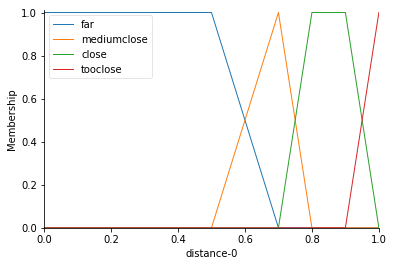

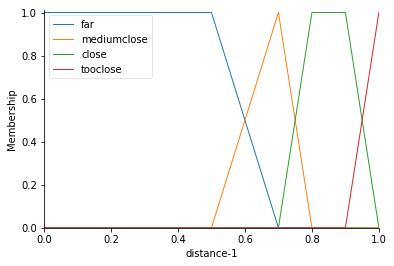

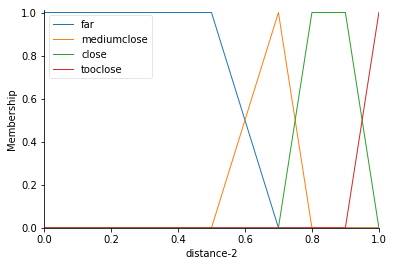

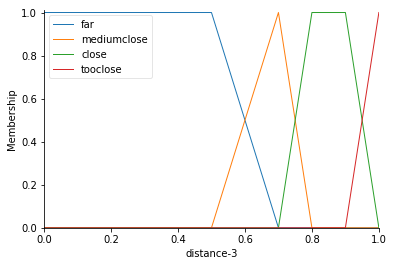

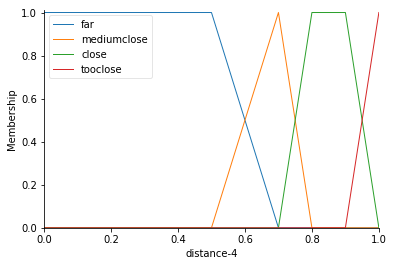

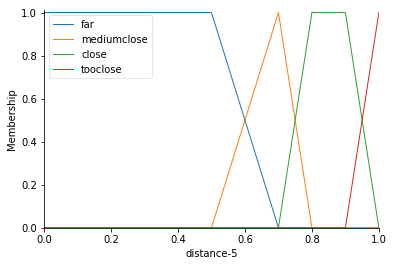

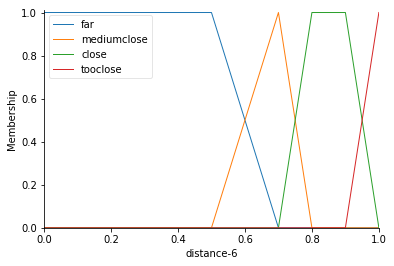

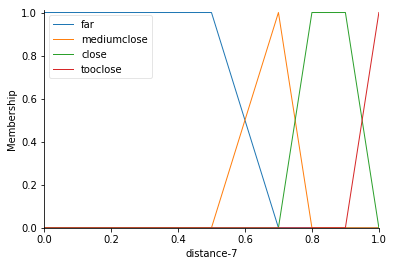

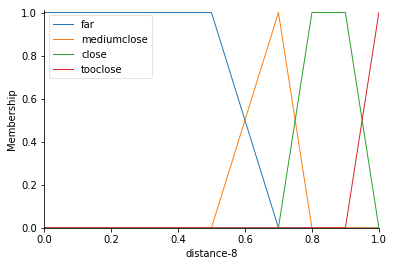

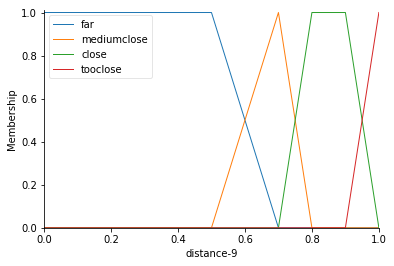

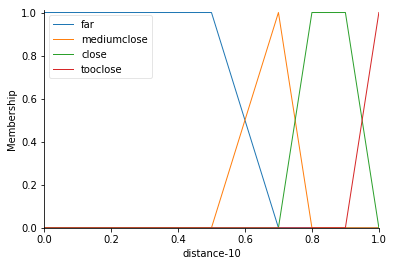

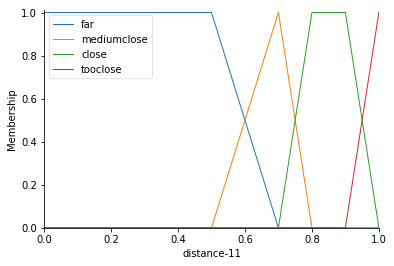

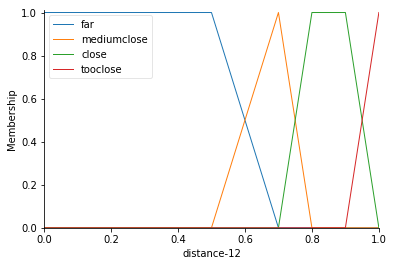

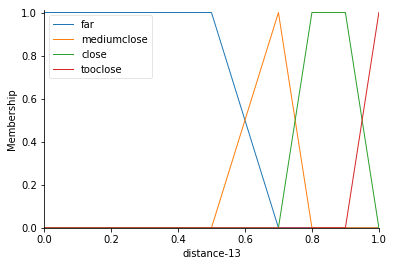

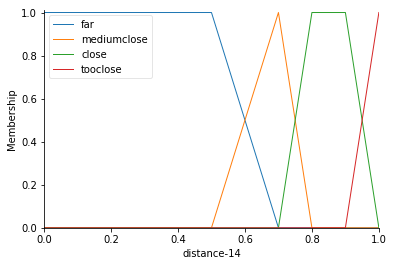

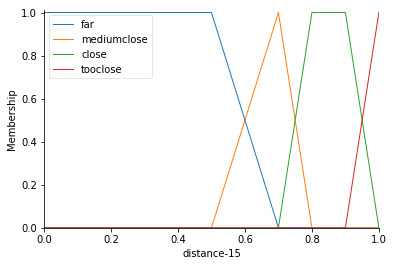

In [24]:
# Distance measured in the Ultrasonic sensor
DISTANCE_STEP = 0.1
distances = []
for i in range(16):
    distance = ctrl.Antecedent(np.arange(0, 1+DISTANCE_STEP, DISTANCE_STEP), 'distance-%d' % i)
    distance['far'] = fuzz.trapmf(distance.universe, [0, 0, 0.5, 0.7])
    distance['mediumclose'] = fuzz.trimf(distance.universe, [0.5, 0.7, 0.8])
    distance['close'] = fuzz.trapmf(distance.universe, [0.7, 0.8, 0.9, 1])
    distance['tooclose'] = fuzz.trimf(distance.universe, [0.9,1, 1])
    distances.append(distance)
len([distance.view() for distance in distances])

1.1519648082658486e-17

1.1519648082658486e-17

(None, None)

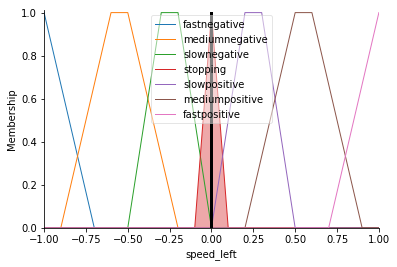

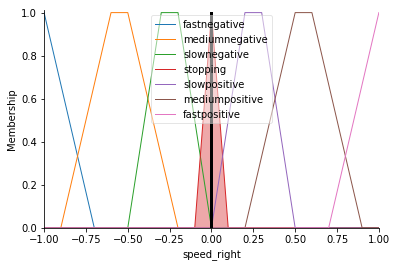

In [25]:
speed_right.defuzzify_method = 'centroid'
speed_left.defuzzify_method = 'centroid'

rules = [ctrl.Rule((distances[1]['mediumclose'] | distances[2]['mediumclose'] | distances[3]['mediumclose']), 
                   speed_left['slownegative']),
         
         ctrl.Rule((distances[1]['close'] | distances[2]['close'] | distances[3]['close']), 
                   speed_left['mediumnegative']),
         
         ctrl.Rule((distances[1]['tooclose'] | distances[2]['tooclose'] | distances[3]['tooclose']), 
                   speed_left['fastnegative']),
         
         
         ctrl.Rule((distances[14]['mediumclose'] | distances[13]['mediumclose'] | distances[12]['mediumclose']), 
                   speed_left['slowpositive']),
         
         ctrl.Rule((distances[14]['close'] | distances[13]['close'] | distances[12]['close']), 
                   speed_left['mediumpositive']),
         
         ctrl.Rule((distances[14]['tooclose'] | distances[13]['tooclose'] | distances[12]['tooclose']), 
                   speed_left['fastpositive']),
         
         
         ctrl.Rule((distances[0]['mediumclose'] | distances[15]['mediumclose']), 
                   speed_left['slowpositive']),
         ctrl.Rule((distances[0]['mediumclose'] | distances[15]['mediumclose']), 
                   speed_right['slownegative']),
         
         ctrl.Rule((distances[0]['close'] | distances[15]['close']), 
                   speed_left['mediumpositive']),
         ctrl.Rule((distances[0]['close'] | distances[15]['close']), 
                   speed_right['mediumnegative']),
         
         ctrl.Rule((distances[0]['tooclose'] | distances[15]['tooclose']), 
                   speed_left['fastpositive']),
         ctrl.Rule((distances[0]['tooclose'] | distances[15]['tooclose']), 
                   speed_right['fastnegative']),
         
         
         ctrl.Rule((distances[0]['far'] & distances[1]['far'] &
                    distances[2]['far'] & distances[3]['far'] &
                    distances[12]['far'] & distances[13]['far'] &
                    distances[14]['far'] & distances[15]['far']
                    ), speed_left['stopping']),
         
         
         ctrl.Rule((distances[4]['mediumclose'] | distances[5]['mediumclose'] | distances[6]['mediumclose']), 
                   speed_right['slownegative']),
         
         ctrl.Rule((distances[4]['close'] | distances[5]['close'] | distances[6]['close']), 
                   speed_right['mediumnegative']),
         
         ctrl.Rule((distances[4]['tooclose'] | distances[5]['tooclose'] | distances[6]['tooclose']), 
                   speed_right['fastnegative']),
         
         
         ctrl.Rule((distances[9]['mediumclose'] | distances[10]['mediumclose'] | distances[11]['mediumclose']), 
                   speed_right['slowpositive']),
         
         ctrl.Rule((distances[9]['close'] | distances[10]['close'] | distances[11]['close']), 
                   speed_right['mediumpositive']),
         
         ctrl.Rule((distances[9]['tooclose'] | distances[10]['tooclose'] | distances[11]['tooclose']), 
                   speed_right['fastpositive']),
         
         
         ctrl.Rule((distances[7]['mediumclose'] | distances[8]['mediumclose']), 
                   speed_right['slowpositive']),
         ctrl.Rule((distances[7]['mediumclose'] | distances[8]['mediumclose']), 
                   speed_left['slownegative']),
         
         ctrl.Rule((distances[7]['close'] | distances[8]['close']), 
                   speed_right['mediumpositive']),
         ctrl.Rule((distances[7]['close'] | distances[8]['close']), 
                   speed_left['mediumnegative']),
         
         ctrl.Rule((distances[7]['tooclose'] | distances[8]['tooclose']), 
                   speed_right['fastpositive']),
         ctrl.Rule((distances[7]['tooclose'] | distances[8]['tooclose']), 
                   speed_left['fastnegative']),
        
        
        ctrl.Rule((distances[4]['far'] & distances[5]['far'] &
                    distances[6]['far'] & distances[7]['far'] &
                    distances[8]['far'] & distances[9]['far'] &
                    distances[10]['far'] & distances[11]['far']
                    ), speed_right['stopping']),
        
        ]

speed_ctrl = ctrl.ControlSystem(rules)
speed_ctrl.composition_method = COMPOSITION_MANDANI
speed_sim = ctrl.ControlSystemSimulation(speed_ctrl)

for i in range(16):
    speed_sim.input['distance-%d'%i] = 0
speed_sim.compute()
display(speed_sim.output['speed_right'], speed_sim.output['speed_left'])

speed_left.view(sim=speed_sim), speed_right.view(sim=speed_sim)

# Avoid obstacles + GoToGoal

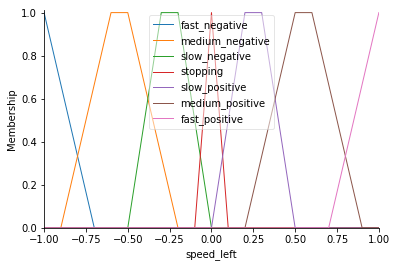

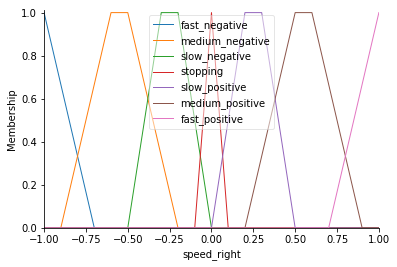

In [26]:
# MF1 - speed
SPEED_STEP = 0.01

speed_left = ctrl.Consequent(np.arange(-1, 1+SPEED_STEP, SPEED_STEP), 'speed_left')
speed_left['fast_negative'] = fuzz.trimf(speed_left.universe, [-1-SPEED_STEP, -1, -0.7])
speed_left['medium_negative'] = fuzz.trapmf(speed_left.universe, [-0.9,-0.6,-0.5,-0.2])
speed_left['slow_negative'] = fuzz.trapmf(speed_left.universe, [-0.5, -0.3, -0.2, 0])
speed_left['stopping'] = fuzz.trimf(speed_left.universe, [-0.1, 0, 0.1])
speed_left['slow_positive'] = fuzz.trapmf(speed_left.universe, [0, 0.2, 0.3, 0.5])
speed_left['medium_positive'] = fuzz.trapmf(speed_left.universe, [0.2, 0.5, 0.6, 0.9])
speed_left['fast_positive'] = fuzz.trimf(speed_left.universe, [0.7, 1, 1+SPEED_STEP])
speed_left.view()

speed_right = ctrl.Consequent(np.arange(-1, 1+SPEED_STEP, SPEED_STEP), 'speed_right')
speed_right['fast_negative'] = fuzz.trimf(speed_right.universe, [-1-SPEED_STEP, -1, -0.7])
speed_right['medium_negative'] = fuzz.trapmf(speed_right.universe, [-0.9,-0.6,-0.5,-0.2])
speed_right['slow_negative'] = fuzz.trapmf(speed_right.universe, [-0.5, -0.3, -0.2, 0])
speed_right['stopping'] = fuzz.trimf(speed_right.universe, [-0.1, 0, 0.1])
speed_right['slow_positive'] = fuzz.trapmf(speed_right.universe, [0, 0.2, 0.3, 0.5])
speed_right['medium_positive'] = fuzz.trapmf(speed_right.universe, [0.2, 0.5, 0.6, 0.9])
speed_right['fast_positive'] = fuzz.trimf(speed_right.universe, [0.7, 1, 1+SPEED_STEP])
speed_right.view()

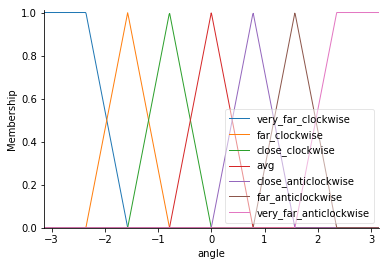

In [27]:
# MF1 - Angle
ANGLE_STEP = 0.01
angle = ctrl.Antecedent(np.arange(-pi, pi+ANGLE_STEP, ANGLE_STEP), 'angle')

angle['very_far_clockwise'] = fuzz.trapmf(angle.universe, [-pi-ANGLE_STEP,-pi,-3*pi/4, -pi/2])
angle['far_clockwise'] = fuzz.trapmf(angle.universe, [-3*pi/4,-pi/2,-pi/2, -pi/4])
angle['close_clockwise'] = fuzz.trapmf(angle.universe, [-pi/2,-pi/4,-pi/4, 0])
angle['avg'] = fuzz.trapmf(angle.universe, [-pi/4,0,0,pi/4])
angle['close_anticlockwise'] = fuzz.trapmf(angle.universe, [0,pi/4,pi/4, pi/2])
angle['far_anticlockwise'] = fuzz.trapmf(angle.universe, [pi/4,pi/2,pi/2, 3*pi/4])
angle['very_far_anticlockwise'] = fuzz.trapmf(angle.universe, [pi/2,3*pi/4,pi+ANGLE_STEP, pi+ANGLE_STEP])

angle.view()

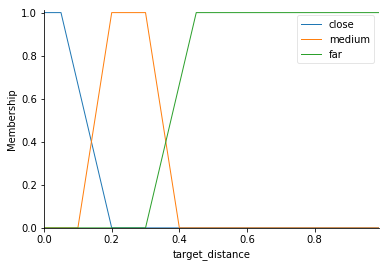

In [28]:
# MF1 - Target Distance
TARGET_DISTANCE_STEP = 0.01
target_distance = ctrl.Antecedent(np.arange(0, 1, TARGET_DISTANCE_STEP), 'target_distance')

target_distance['close'] = fuzz.trapmf(target_distance.universe, [-ANGLE_STEP,0,0.05, 0.2])
target_distance['medium'] = fuzz.trapmf(target_distance.universe,[0.1,0.2,0.3, 0.4])
target_distance['far'] = fuzz.trapmf(target_distance.universe, [0.3,0.45,1, 1+TARGET_DISTANCE_STEP])

target_distance.view()

16

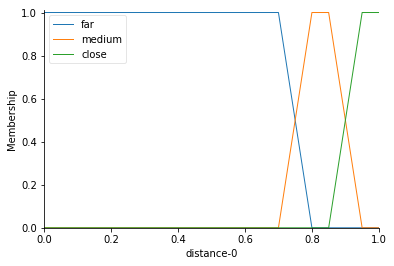

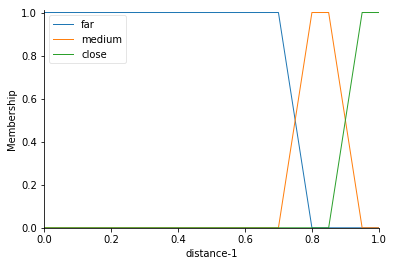

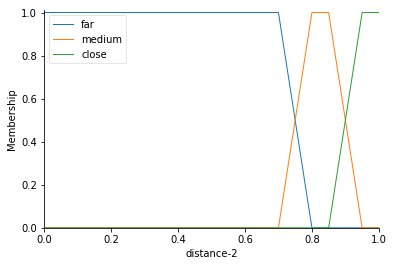

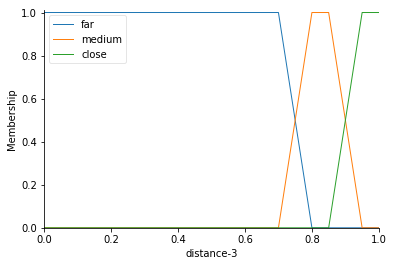

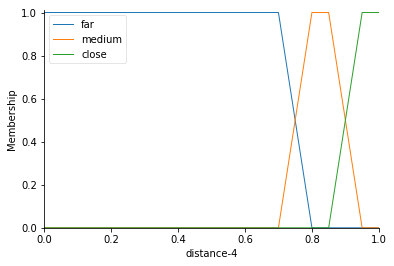

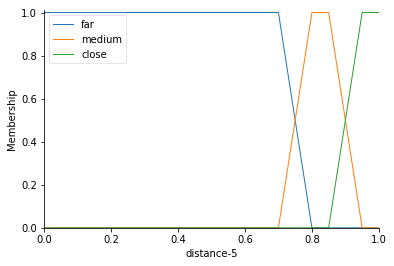

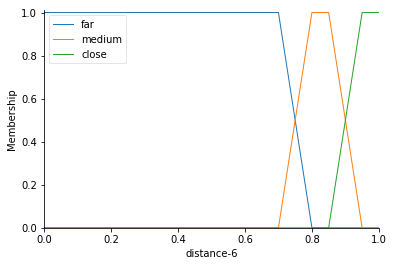

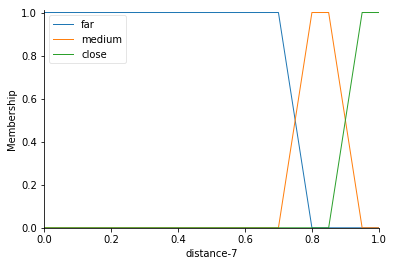

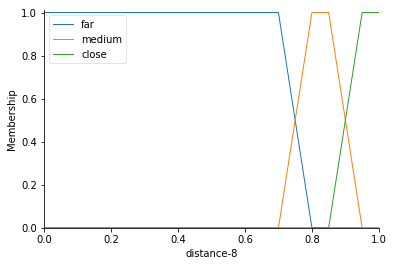

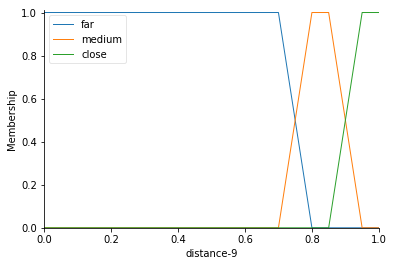

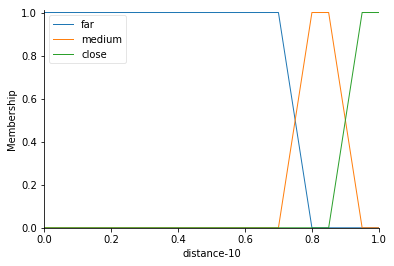

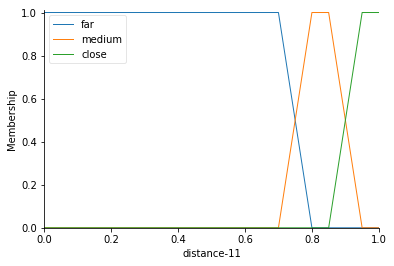

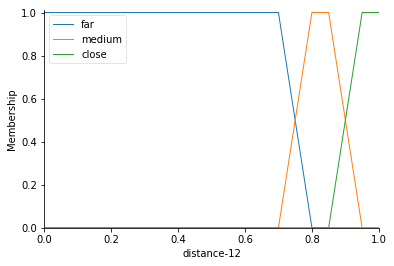

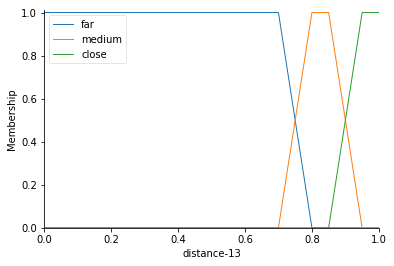

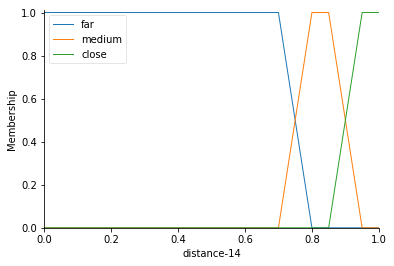

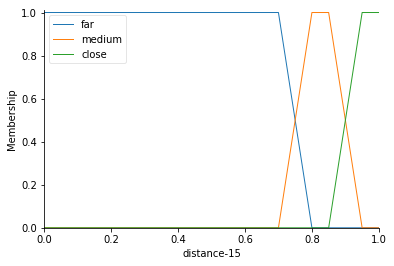

In [29]:
# MF1 - Sensors Distance
DISTANCE_STEP = 0.01
distances = []
for i in range(16):
    distance = ctrl.Antecedent(np.arange(0, 1+DISTANCE_STEP, DISTANCE_STEP), 'distance-%d' % i)
    distance['far'] = fuzz.trapmf(distance.universe, [-DISTANCE_STEP,0,0.7, 0.8])
    distance['medium'] = fuzz.trapmf(distance.universe, [0.7,0.8,0.85, 0.95])
    distance['close'] = fuzz.trapmf(distance.universe, [0.85, 0.95, 1, 1+DISTANCE_STEP])
    distances.append(distance)
len([distance.view() for distance in distances])

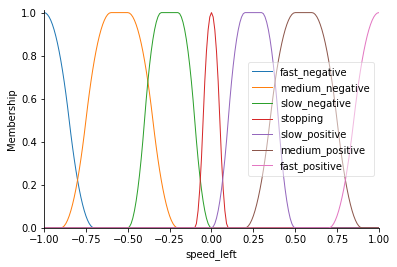

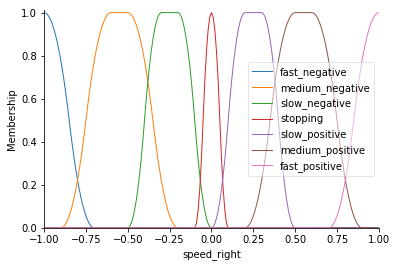

In [30]:
import math
# MF2 - speed
SPEED_STEP = 0.01

speed_left = ctrl.Consequent(np.arange(-1, 1+SPEED_STEP, SPEED_STEP), 'speed_left')
speed_left['fast_negative'] = fuzz.pimf(speed_left.universe, -1-SPEED_STEP, -1, -1, -0.7)
speed_left['medium_negative'] = fuzz.pimf(speed_left.universe, -0.9,-0.6,-0.5,-0.2)
speed_left['slow_negative'] = fuzz.pimf(speed_left.universe, -0.5, -0.3, -0.2, 0)
speed_left['stopping'] = fuzz.pimf(speed_left.universe, -0.1, 0,0, 0.1)
speed_left['slow_positive'] = fuzz.pimf(speed_left.universe, 0, 0.2, 0.3, 0.5)
speed_left['medium_positive'] = fuzz.pimf(speed_left.universe, 0.2, 0.5, 0.6, 0.9)
speed_left['fast_positive'] = fuzz.pimf(speed_left.universe, 0.7, 1, 1, 1+SPEED_STEP)
speed_left.view()

speed_right = ctrl.Consequent(np.arange(-1, 1+SPEED_STEP, SPEED_STEP), 'speed_right')
speed_right['fast_negative'] = fuzz.pimf(speed_right.universe, -1-SPEED_STEP,-1, -1, -0.7)
speed_right['medium_negative'] = fuzz.pimf(speed_right.universe, -0.9,-0.6,-0.5,-0.2)
speed_right['slow_negative'] = fuzz.pimf(speed_right.universe, -0.5, -0.3, -0.2, 0)
speed_right['stopping'] = fuzz.pimf(speed_right.universe, -0.1, 0,0, 0.1)
speed_right['slow_positive'] = fuzz.pimf(speed_right.universe, 0, 0.2, 0.3, 0.5)
speed_right['medium_positive'] = fuzz.pimf(speed_right.universe, 0.2, 0.5, 0.6, 0.9)
speed_right['fast_positive'] = fuzz.pimf(speed_right.universe, 0.7, 1, 1, 1+SPEED_STEP)
speed_right.view()

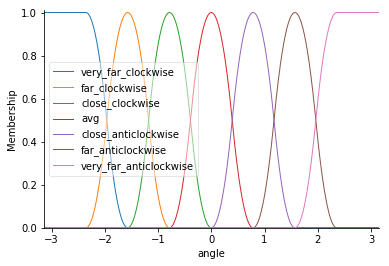

In [31]:
# MF2 - Angle
from math import pi
ANGLE_STEP = 0.01
angle = ctrl.Antecedent(np.arange(-pi, pi+ANGLE_STEP, ANGLE_STEP), 'angle')

angle['very_far_clockwise'] = fuzz.pimf(angle.universe, -pi-ANGLE_STEP,-pi,-3*pi/4, -pi/2)
angle['far_clockwise'] = fuzz.pimf(angle.universe, -3*pi/4,-pi/2,-pi/2, -pi/4)
angle['close_clockwise'] = fuzz.pimf(angle.universe, -pi/2,-pi/4,-pi/4, 0)
angle['avg'] = fuzz.pimf(angle.universe, -pi/4,0,0,pi/4)
angle['close_anticlockwise'] = fuzz.pimf(angle.universe, 0,pi/4,pi/4, pi/2)
angle['far_anticlockwise'] = fuzz.pimf(angle.universe, pi/4,pi/2,pi/2, 3*pi/4)
angle['very_far_anticlockwise'] = fuzz.pimf(angle.universe, pi/2,3*pi/4,pi+ANGLE_STEP, pi+ANGLE_STEP)

angle.view()

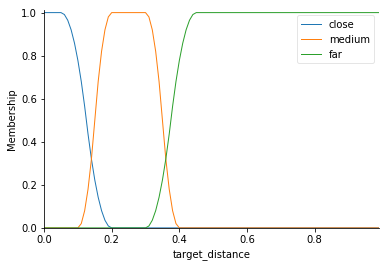

In [32]:
# MF2 - target distance
TARGET_DISTANCE_STEP = 0.01
target_distance = ctrl.Antecedent(np.arange(0, 1, TARGET_DISTANCE_STEP), 'target_distance')

target_distance['close'] = fuzz.pimf(target_distance.universe, -ANGLE_STEP,0,0.05, 0.2)
target_distance['medium'] = fuzz.pimf(target_distance.universe,0.1,0.2,0.3, 0.4)
target_distance['far'] = fuzz.pimf(target_distance.universe, 0.3,0.45,1, 1+TARGET_DISTANCE_STEP)

target_distance.view()

16

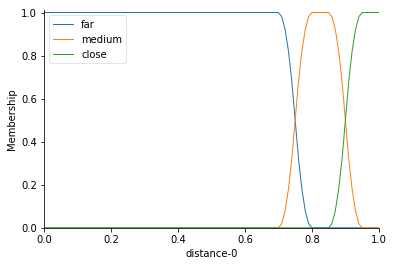

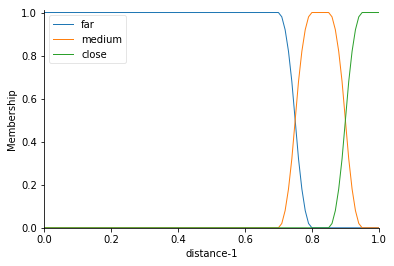

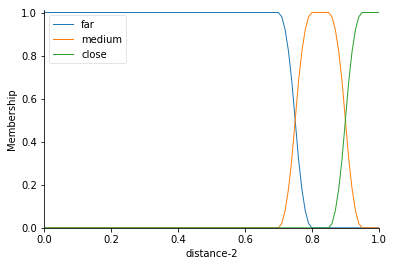

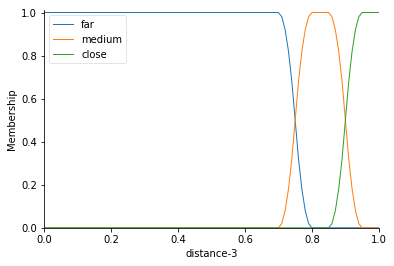

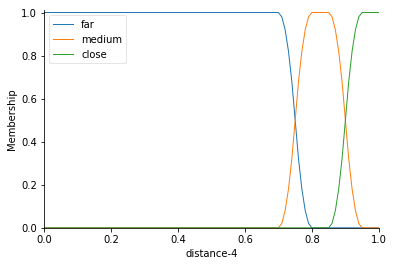

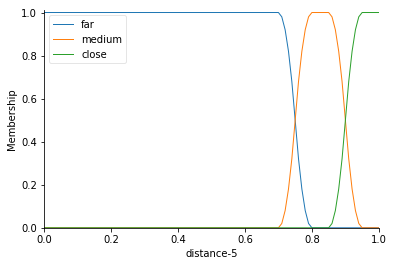

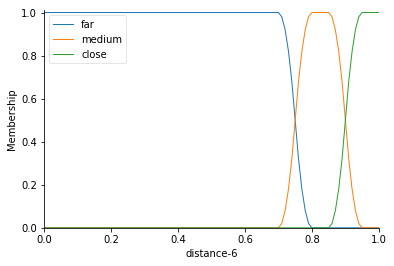

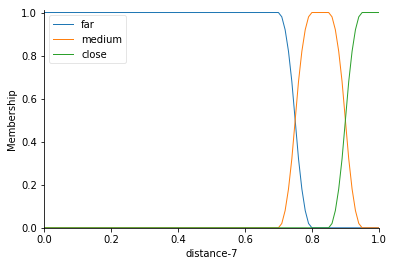

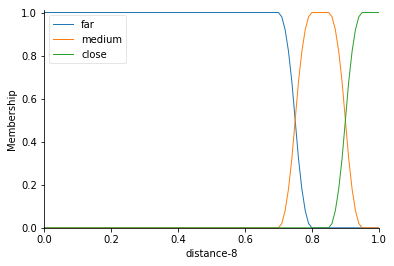

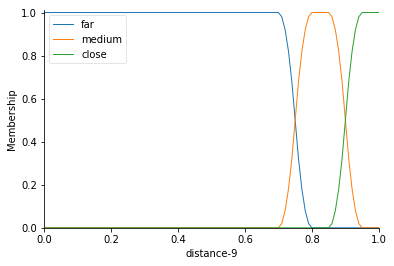

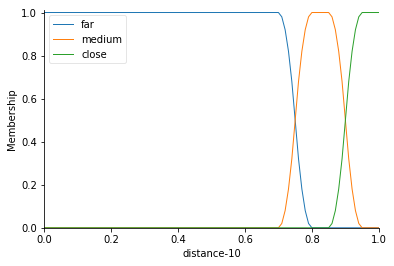

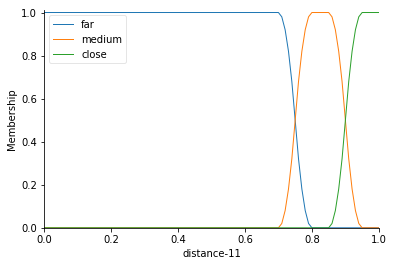

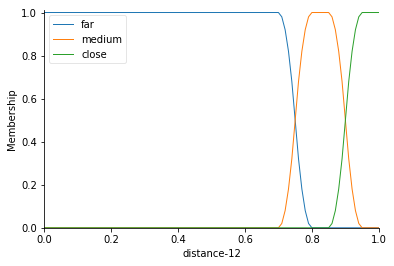

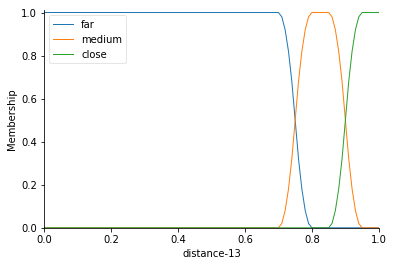

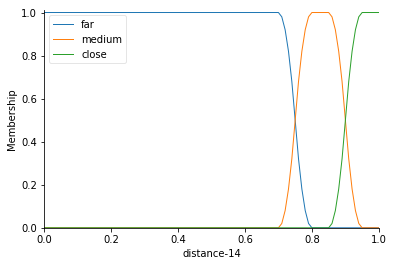

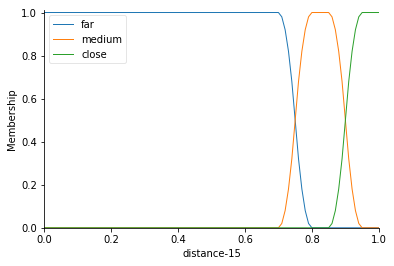

In [33]:
# MF2 - sensors distance
DISTANCE_STEP = 0.01
distances = []
for i in range(16):
    distance = ctrl.Antecedent(np.arange(0, 1+DISTANCE_STEP, DISTANCE_STEP), 'distance-%d' % i)
    distance['far'] = fuzz.pimf(distance.universe, -DISTANCE_STEP,0,0.7, 0.8)
    distance['medium'] = fuzz.pimf(distance.universe, 0.7,0.8,0.85, 0.95)
    distance['close'] = fuzz.pimf(distance.universe, 0.85, 0.95, 1, 1+DISTANCE_STEP)
    distances.append(distance)
len([distance.view() for distance in distances])

0.3739964217286095

0.3739619239576725

(None, None)

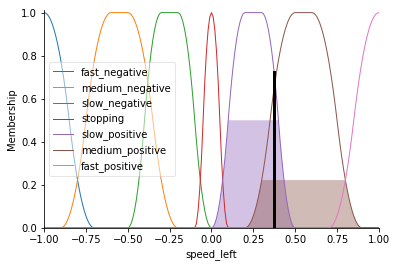

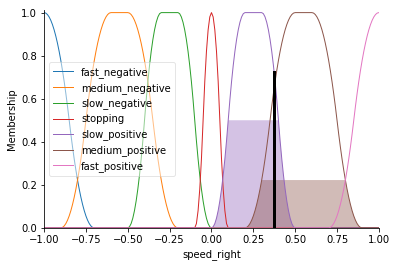

In [37]:
speed_right.defuzzify_method = 'centroid'
speed_left.defuzzify_method = 'centroid'

rules = [
    # rules to adjust the angles
    ctrl.Rule(angle["very_far_clockwise"] & (~( distances[1]['medium'] | distances[2]['medium'] | distances[3]['medium'] | distances[4]['medium'] |distances[5]['medium'] | distances[6]['medium'])) & (~(distances[1]['close'] | distances[2]['close'] | distances[3]['close'] | distances[4]['close'] | distances[5]['close'] | distances[6]['close'])) & ~target_distance["close"], speed_left['fast_positive']),
    ctrl.Rule(angle["very_far_clockwise"] & (~( distances[1]['medium'] | distances[2]['medium'] | distances[3]['medium'] | distances[4]['medium'] |distances[5]['medium'] | distances[6]['medium'])) & (~(distances[1]['close'] | distances[2]['close'] | distances[3]['close'] | distances[4]['close'] | distances[5]['close'] | distances[6]['close'])) & ~target_distance["close"], speed_right['fast_negative']),

    ctrl.Rule(angle["far_clockwise"] & (~( distances[1]['medium'] | distances[2]['medium'] | distances[3]['medium'] | distances[4]['medium'] |distances[5]['medium'] | distances[6]['medium'])) & (~(distances[1]['close'] | distances[2]['close'] | distances[3]['close'] | distances[4]['close'] | distances[5]['close'] | distances[6]['close'])) & ~target_distance["close"], speed_left['medium_positive']),
    ctrl.Rule(angle["far_clockwise"] & (~( distances[1]['medium'] | distances[2]['medium'] | distances[3]['medium'] | distances[4]['medium'] |distances[5]['medium'] | distances[6]['medium'])) & (~(distances[1]['close'] | distances[2]['close'] | distances[3]['close'] | distances[4]['close'] | distances[5]['close'] | distances[6]['close'])) & ~target_distance["close"], speed_right['medium_negative']),

    ctrl.Rule(angle["close_clockwise"] & (~( distances[1]['medium'] | distances[2]['medium'] | distances[3]['medium'] | distances[4]['medium'] |distances[5]['medium'] | distances[6]['medium'])) & (~(distances[1]['close'] | distances[2]['close'] | distances[3]['close'] | distances[4]['close'] | distances[5]['close'] | distances[6]['close'])) & ~target_distance["close"], speed_left['slow_positive']),
    ctrl.Rule(angle["close_clockwise"] & (~( distances[1]['medium'] | distances[2]['medium'] | distances[3]['medium'] | distances[4]['medium'] |distances[5]['medium'] | distances[6]['medium'])) & (~(distances[1]['close'] | distances[2]['close'] | distances[3]['close'] | distances[4]['close'] | distances[5]['close'] | distances[6]['close'])) & ~target_distance["close"], speed_right['slow_negative']),

    ctrl.Rule(angle["close_anticlockwise"] & (~( distances[1]['medium'] | distances[2]['medium'] | distances[3]['medium'] | distances[4]['medium'] |distances[5]['medium'] | distances[6]['medium'])) & (~(distances[1]['close'] | distances[2]['close'] | distances[3]['close'] | distances[4]['close'] | distances[5]['close'] | distances[6]['close'])) & ~target_distance["close"], speed_right['slow_positive']),
    ctrl.Rule(angle["close_anticlockwise"] & (~( distances[1]['medium'] | distances[2]['medium'] | distances[3]['medium'] | distances[4]['medium'] |distances[5]['medium'] | distances[6]['medium'])) & (~(distances[1]['close'] | distances[2]['close'] | distances[3]['close'] | distances[4]['close'] | distances[5]['close'] | distances[6]['close'])) & ~target_distance["close"], speed_left['slow_negative']),

    ctrl.Rule(angle["far_anticlockwise"] & (~( distances[1]['medium'] | distances[2]['medium'] | distances[3]['medium'] | distances[4]['medium'] |distances[5]['medium'] | distances[6]['medium'])) & (~(distances[1]['close'] | distances[2]['close'] | distances[3]['close'] | distances[4]['close'] | distances[5]['close'] | distances[6]['close'])) & ~target_distance["close"], speed_right['medium_positive']),
    ctrl.Rule(angle["far_anticlockwise"] & (~( distances[1]['medium'] | distances[2]['medium'] | distances[3]['medium'] | distances[4]['medium'] |distances[5]['medium'] | distances[6]['medium'])) & (~(distances[1]['close'] | distances[2]['close'] | distances[3]['close'] | distances[4]['close'] | distances[5]['close'] | distances[6]['close'])) & ~target_distance["close"], speed_left['medium_negative']),

    ctrl.Rule(angle["very_far_anticlockwise"] & (~( distances[1]['medium'] | distances[2]['medium'] | distances[3]['medium'] | distances[4]['medium'] |distances[5]['medium'] | distances[6]['medium'])) & (~(distances[1]['close'] | distances[2]['close'] | distances[3]['close'] | distances[4]['close'] | distances[5]['close'] | distances[6]['close'])) & ~target_distance["close"], speed_right['fast_positive']),
    ctrl.Rule(angle["very_far_anticlockwise"] & (~( distances[1]['medium'] | distances[2]['medium'] | distances[3]['medium'] | distances[4]['medium'] |distances[5]['medium'] | distances[6]['medium'])) & (~(distances[1]['close'] | distances[2]['close'] | distances[3]['close'] | distances[4]['close'] | distances[5]['close'] | distances[6]['close'])) & ~target_distance["close"], speed_left['fast_negative']),

    # rules to adjust the speed towards the target
    ctrl.Rule(target_distance["far"] & (~( distances[1]['medium'] | distances[2]['medium'] | distances[3]['medium'] | distances[4]['medium'] |distances[5]['medium'] | distances[6]['medium'])) & (~(distances[1]['close'] | distances[2]['close'] | distances[3]['close'] | distances[4]['close'] | distances[5]['close'] | distances[6]['close'])), speed_left['medium_positive']),
    ctrl.Rule(target_distance["far"] & (~( distances[1]['medium'] | distances[2]['medium'] | distances[3]['medium'] | distances[4]['medium'] |distances[5]['medium'] | distances[6]['medium'])) & (~(distances[1]['close'] | distances[2]['close'] | distances[3]['close'] | distances[4]['close'] | distances[5]['close'] | distances[6]['close'])), speed_right['medium_positive']),

    ctrl.Rule(target_distance["medium"] & (~( distances[1]['medium'] | distances[2]['medium'] | distances[3]['medium'] | distances[4]['medium'] |distances[5]['medium'] | distances[6]['medium'])) & (~(distances[1]['close'] | distances[2]['close'] | distances[3]['close'] | distances[4]['close'] | distances[5]['close'] | distances[6]['close'])), speed_left['slow_positive']),
    ctrl.Rule(target_distance["medium"] & (~( distances[1]['medium'] | distances[2]['medium'] | distances[3]['medium'] | distances[4]['medium'] |distances[5]['medium'] | distances[6]['medium'])) & (~(distances[1]['close'] | distances[2]['close'] | distances[3]['close'] | distances[4]['close'] | distances[5]['close'] | distances[6]['close'])), speed_right['slow_positive']),

    ctrl.Rule(target_distance["close"] & (~( distances[1]['medium'] | distances[2]['medium'] | distances[3]['medium'] | distances[4]['medium'] |distances[5]['medium'] | distances[6]['medium'])) & (~(distances[1]['close'] | distances[2]['close'] | distances[3]['close'] | distances[4]['close'] | distances[5]['close'] | distances[6]['close'])), speed_left['stopping']),
    ctrl.Rule(target_distance["close"] & (~( distances[1]['medium'] | distances[2]['medium'] | distances[3]['medium'] | distances[4]['medium'] |distances[5]['medium'] | distances[6]['medium'])) & (~(distances[1]['close'] | distances[2]['close'] | distances[3]['close'] | distances[4]['close'] | distances[5]['close'] | distances[6]['close'])), speed_right['stopping']),

    # rules to avoid obstacles - only the frontal sensors matter
    ctrl.Rule(
        (distances[1]['medium'] | distances[2]['medium'] | distances[3]['medium']),
        speed_left['slow_positive']),
    ctrl.Rule(
        (distances[1]['medium'] | distances[2]['medium'] | distances[3]['medium']),
        speed_right['slow_negative']),

    ctrl.Rule((distances[1]['close'] | distances[2]['close'] | distances[3]['close']),
              speed_left['medium_positive']),
    ctrl.Rule((distances[1]['close'] | distances[2]['close'] | distances[3]['close']),
              speed_right['medium_negative']),

    ctrl.Rule(
        (distances[4]['medium'] | distances[5]['medium'] | distances[6]['medium']),
        speed_left['slow_negative']),
    ctrl.Rule(
        (distances[4]['medium'] | distances[5]['medium'] | distances[6]['medium']),
        speed_right['slow_positive']),

    ctrl.Rule((distances[4]['close'] | distances[5]['close'] | distances[6]['close']),
              speed_left['medium_negative']),
    ctrl.Rule((distances[4]['close'] | distances[5]['close'] | distances[6]['close']),
              speed_right['medium_positive']),
]
    
speed_ctrl = ctrl.ControlSystem(rules)
speed_ctrl.composition_method = COMPOSITION_MANDANI
speed_sim = ctrl.ControlSystemSimulation(speed_ctrl)

speed_sim.input['angle'] = 0
speed_sim.input['target_distance'] = 0.35
for i in range(8):
    if i in list(range(1, 7)):
        speed_sim.input['distance-%d' % i] = 0
speed_sim.compute()

display(speed_sim.output['speed_right'], speed_sim.output['speed_left'])

speed_left.view(sim=speed_sim), speed_right.view(sim=speed_sim)